*   **Name: Shivprasad A. Mhaind**
*   **PRN: 123B1B266**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create the dataset from the assignment
data = {
    'S1': [0.1, 0.15, 0.08, 0.16, 0.2, 0.25, 0.24, 0.3],
    'S2': [0.6, 0.71, 0.9, 0.85, 0.3, 0.5, 0.1, 0.2]
}

In [ ]:
points = ['P{}' .format(i+1) for i in range(8)]
df = pd.DataFrame(data, index=points)

In [ ]:
#Initial Centroids
C1 = df.loc['P1'].values
C2 = df.loc['P8'].values

print("--- Initialization ---")
print("Initial Centroid C1 (P1): ", C1)
print("Initial Centroid C2 (P8): ", C2)
print("-" * 25)

--- Initialization ---
Initial Centroid C1 (P1):  [0.1 0.6]
Initial Centroid C2 (P8):  [0.3 0.2]
-------------------------


In [ ]:
def euclidean_distance(p1, p2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt(np.sum((p1 - p2)**2))

clusters = []
for i in range(len(df)):
    point = df.iloc[i].values
    dist_c1 = euclidean_distance(point, C1)
    dist_c2 = euclidean_distance(point, C2)
    if dist_c1 < dist_c2:
        clusters.append(1)
    else:
        clusters.append(2)

df['Cluster'] = clusters

print("\n--- Assignment Step Results ---")
print("Data points with initial cluster assignments:")
print(df)
print("-" * 25)


--- Assignment Step Results ---
Data points with initial cluster assignments:
      S1    S2  Cluster
P1  0.10  0.60        1
P2  0.15  0.71        1
P3  0.08  0.90        1
P4  0.16  0.85        1
P5  0.20  0.30        2
P6  0.25  0.50        1
P7  0.24  0.10        2
P8  0.30  0.20        2
-------------------------


In [ ]:
# 2. Answer the questions based on the first assignment
print("\n--- Final Answers ---")
# Question 1
p6_cluster = df.loc['P6', 'Cluster']
print(f"1. Which cluster does P6 belong to?: Cluster #{p6_cluster}")


--- Final Answers ---
1. Which cluster does P6 belong to?: Cluster #1


In [ ]:
# Question 2
cluster2_population = df[df['Cluster'] == 2].shape[0]
print(f"2. What is the population of cluster around C2?: {cluster2_population}")

# 3. Update Step: Calculate the new centroids
C1_new = df[df['Cluster'] == 1][['S1', 'S2']].mean().values
C2_new = df[df['Cluster'] == 2][['S1', 'S2']].mean().values

# Question 3
print(f"3. What is the updated value of C1 and C2?")
print(f"   Updated C1 = {np.round(C1_new, 3)}")
print(f"   Updated C2 = {np.round(C2_new, 3)}")
print("-" * 25)

2. What is the population of cluster around C2?: 3
3. What is the updated value of C1 and C2?
   Updated C1 = [0.148 0.712]
   Updated C2 = [0.247 0.2  ]
-------------------------


/tmp/ipython-input-4204059814.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df['S1'][i]+0.005, df['S2'][i], point, fontdict={'fontsize': 12})


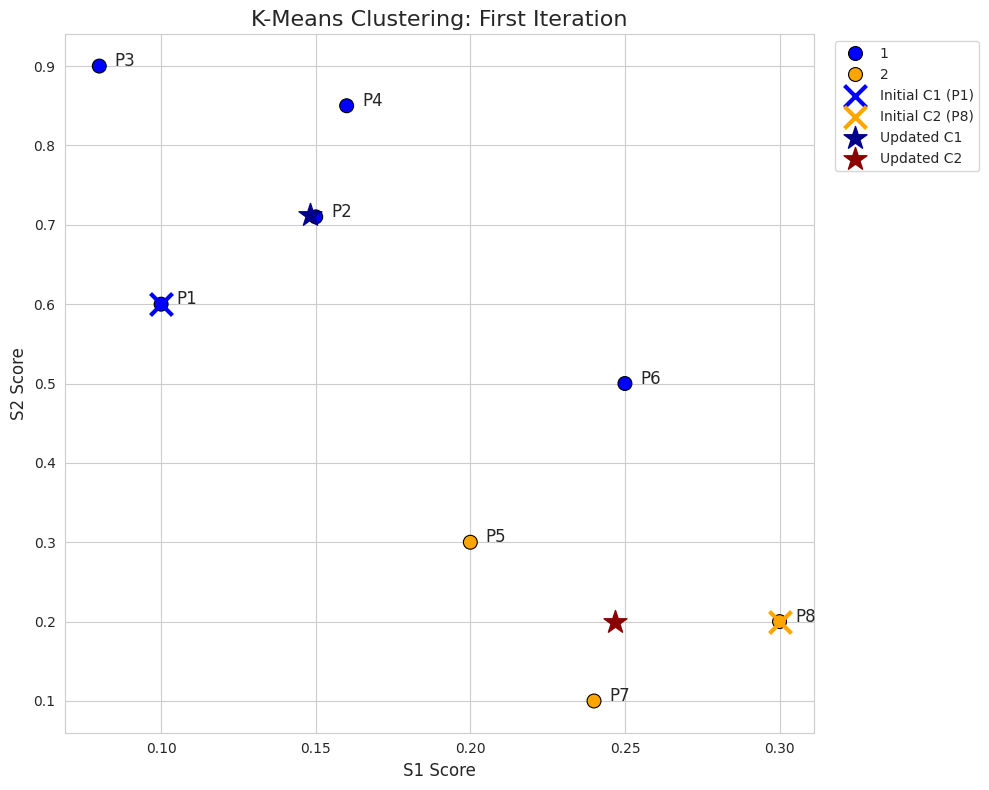

In [ ]:
# --- Visualization ---
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Plot data points for each cluster
palette = {1: 'blue', 2: 'orange'}
ax = sns.scatterplot(
    x='S1',
    y='S2',
    data=df,
    hue='Cluster',
    palette=palette,
    s=100,
    edgecolor='k'
)

# Plot initial centroids
plt.scatter(C1[0], C1[1], color='blue', marker='x', s=250, label='Initial C1 (P1)', lw=3)
plt.scatter(C2[0], C2[1], color='orange', marker='x', s=250, label='Initial C2 (P8)', lw=3)

# Plot updated centroids
plt.scatter(C1_new[0], C1_new[1], color='darkblue', marker='*', s=300, label='Updated C1')
plt.scatter(C2_new[0], C2_new[1], color='darkred', marker='*', s=300, label='Updated C2')

# Annotate points
for i, point in enumerate(df.index):
    plt.text(df['S1'][i]+0.005, df['S2'][i], point, fontdict={'fontsize': 12})

plt.title('K-Means Clustering: First Iteration', fontsize=16)
plt.xlabel('S1 Score', fontsize=12)
plt.ylabel('S2 Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()